In [5]:
# stage 1 prbolem definition
# classfy who can survive

In [6]:
# stage 2 acquire data

import os

data_dir = 'data'
competition_name = 'titanic'

# download data
if not os.path.exists(data_dir):
    os.mkdir(data_dir)
    if os.system(f'cd {data_dir} && kaggle competitions download -c {competition_name} && tar -xzvf {competition_name}.zip') != 0:
        print('download data error')

import numpy as np
import pandas as pd

train_df = pd.read_csv('./data/train.csv', index_col='PassengerId')
test_df = pd.read_csv('./data/test.csv', index_col='PassengerId')

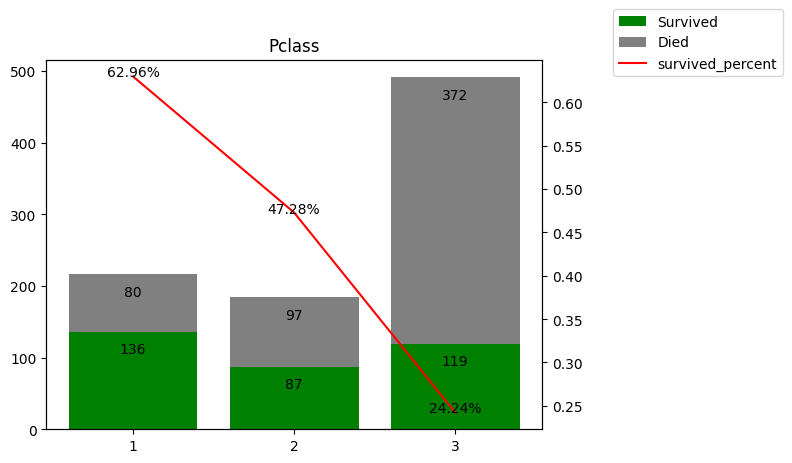

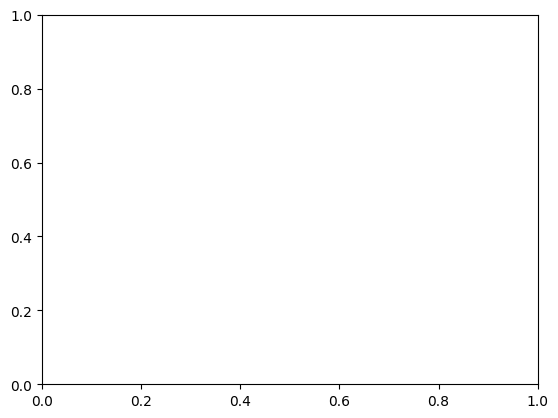

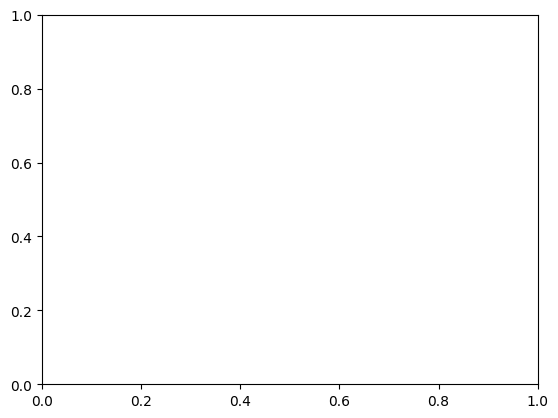

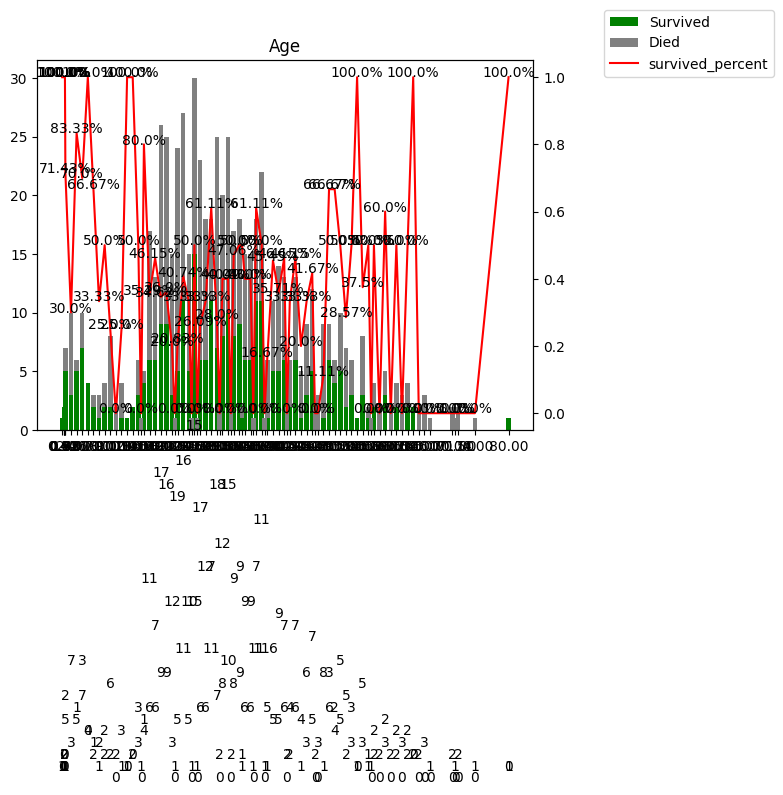

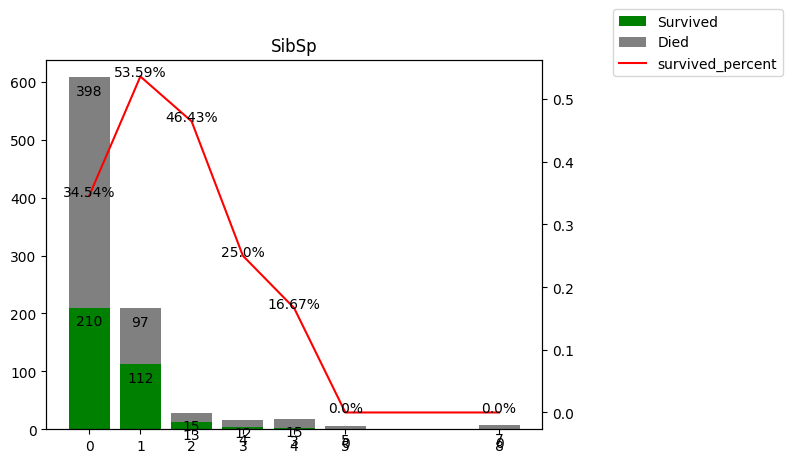

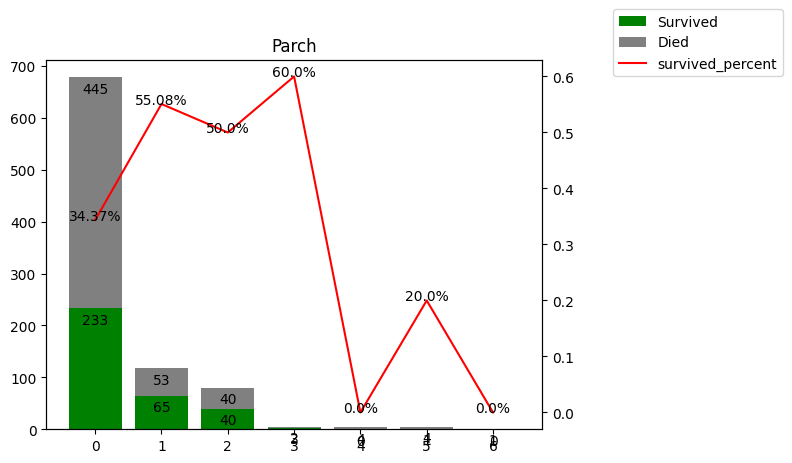

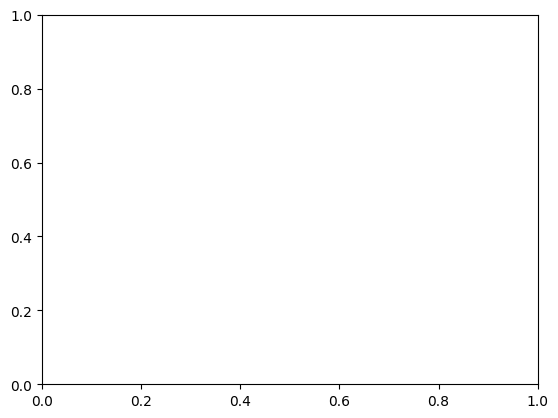

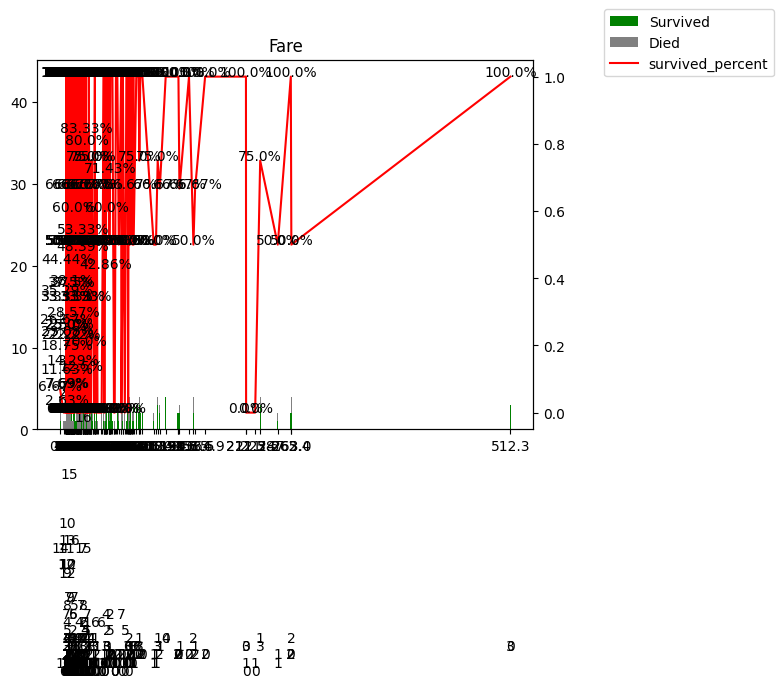

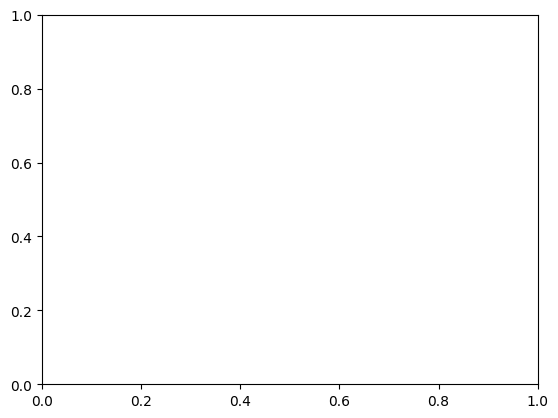

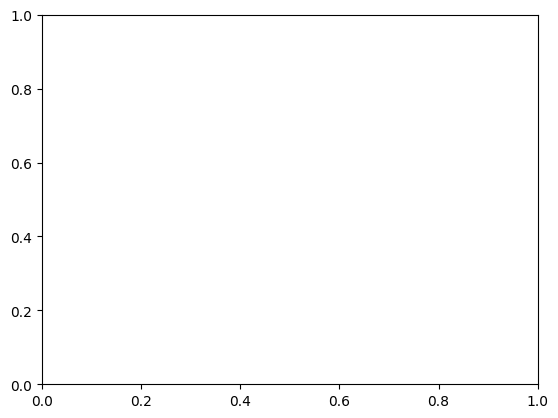

In [90]:
# stage 3 read data and analyze data

# print(train_df.columns.values)
# print(train_df.info())
# print(train_df.describe()) # 连续型数据量统计
# print(train_df.describe(include=['O'])) # 离散型数据量统计

# 分布统计表
# for column in train_df.columns:
#     target = 'Survived'
#     if column != target:
#         statistic = train_df[[column, target]].groupby([column], as_index=False).mean().sort_values(by=target, ascending=False)
#         print(statistic)
#         print()

# 分布统计图
import matplotlib.pyplot as plt
for column in train_df.columns:
    target = 'Survived'
    try:
        if column != target:
            total_count = train_df[[column, target]].groupby([column]).count()
            survived = train_df[[column, target]].groupby([column]).sum()
            survived['Died'] = pd.Series(total_count[target]) - pd.Series(survived[target])
            survived['percent'] = pd.Series(survived[target]) / pd.Series(total_count[target])

            fig = plt.figure()
            ax = fig.add_subplot(111)
            ax.set_xticks(survived.index)
            ax.bar(survived.index, survived[target], label=target, color='green')
            ax.bar(survived.index, survived['Died'], bottom=survived[target], label='Died', color='grey')

            for x, y1, y2 in zip(survived.index, survived[target], survived['Died']):
                plt.text(x, y1-30, str(y1), ha='center')
                plt.text(x, y1 + y2-30, str(y2), ha='center')

            ax_percent = ax.twinx()
            ax_percent.plot(survived.index, survived['percent'], label = 'survived_percent', color='red')
            for x, y in zip(survived.index, survived['percent']):
                plt.text(x, y, str(round(y * 100, 2))+'%', ha='center')

            fig.legend(loc=2, bbox_to_anchor=(1,1))
            plt.title(column)
            plt.show()
            
    except:
        continue


In [ ]:
# submit
result_file = 'gender_submission.csv'
os.system(f'cd {data_dir} && kaggle competitions submit -c {competition_name} -f {result_file} -m "submit"')
os.system(f'kaggle competitions submissions {competition_name}')

100%|██████████| 3.18k/3.18k [00:04<00:00, 708B/s]  


Successfully submitted to Titanic - Machine Learning from DisasterfileName               date                 description  status    publicScore  privateScore  
---------------------  -------------------  -----------  --------  -----------  ------------  
gender_submission.csv  2023-01-15 07:22:44  submit       pending                              
gender_submission.csv  2023-01-15 06:20:15  submit       complete  0.76555                    
gender_submission.csv  2023-01-15 06:13:12  test         complete  0.76555                    
gender_submission.csv  2023-01-15 05:58:15  test         complete  0.76555                    


0